### Data description

- **Dimensions:** The data has three dimensions: longitude (**`lon`**) with 41 points, latitude (**`lat`**) with 26 points, and time (**`time`**) with 216 points. The longitude ranges from 20 degrees west to 20 degrees east, and the latitude ranges from 45 degrees to 20 degrees north. The time covers monthly intervals from January 1982 to June 2017.
- **Coordinates:**
    - **`lon`**: Longitude, with values from 20 degrees west to 20 degrees east.
    - **`lat`**: Latitude, with values from 45 degrees to 20 degrees north.
    - **`time`**: Time, covering monthly intervals from January 1982 to June 2017.
- **Data Variables:**
    - **`var228`**: A float32 variable over time, latitude, and longitude dimensions.
- **Attributes:** The dataset includes metadata attributes such as the Climate Data Interface (CDI) version, CF (Climate and Forecast) conventions version, a history log, the institution that generated the file (European Centre for Medium-Range Weather Forecasts), and the version of the Climate Data Operators (CDO) used.

This dataset appears to be related to climate data, likely representing some climate variable (indicated as **`var228`**, but the specific nature of this variable is not described ‘precipitation variable’) across a specified geographic area (Morocco) over a 35-year period on a monthly basis.

In [2]:
import xarray as xr

data = xr.open_dataset('C:/Users/DataScience/Desktop/stat/Precipitations_bias_correction/DATASET/dataset_test2023/dec23.nc')

data

c:\Users\DataScience\AppData\Local\Programs\Python\Python310\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset> Size: 21kB
Dimensions:  (lon: 41, lat: 21, time: 6)
Coordinates:
  * lon      (lon) float64 328B -20.0 -19.0 -18.0 -17.0 ... 17.0 18.0 19.0 20.0
  * lat      (lat) float64 168B 40.0 39.0 38.0 37.0 36.0 ... 23.0 22.0 21.0 20.0
  * time     (time) datetime64[ns] 48B 2024-01-01 2024-02-01 ... 2024-06-01
Data variables:
    var228   (time, lat, lon) float32 21kB ...
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Sun May 05 19:55:21 2024: cdo -f nc copy C:\Users\DataScien...
    institution:  European Centre for Medium-Range Weather Forecasts
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...

### Manipulation

In [3]:
import pandas as pd

In [4]:
# Converting the NetCDF data variable 'var228' to a Pandas DataFrame
df = data['var228'].to_dataframe().reset_index()

df.shape

(5166, 4)

In [5]:
df

,time,lat,lon,var228
0,2024-01-01,40.0,-20.0,2.864746
1,2024-01-01,40.0,-19.0,2.819092
2,2024-01-01,40.0,-18.0,2.742554
3,2024-01-01,40.0,-17.0,2.552734
4,2024-01-01,40.0,-16.0,2.354126
...,...,...,...,...
5161,2024-06-01,20.0,16.0,0.010980
5162,2024-06-01,20.0,17.0,0.010370
5163,2024-06-01,20.0,18.0,0.015069
5164,2024-06-01,20.0,19.0,0.014123


In [6]:
df['prec_est'] = df['var228']
df = df.drop(columns=['var228'], axis=1)

df

,time,lat,lon,prec_est
0,2024-01-01,40.0,-20.0,2.864746
1,2024-01-01,40.0,-19.0,2.819092
2,2024-01-01,40.0,-18.0,2.742554
3,2024-01-01,40.0,-17.0,2.552734
4,2024-01-01,40.0,-16.0,2.354126
...,...,...,...,...
5161,2024-06-01,20.0,16.0,0.010980
5162,2024-06-01,20.0,17.0,0.010370
5163,2024-06-01,20.0,18.0,0.015069
5164,2024-06-01,20.0,19.0,0.014123


In [7]:
df.to_csv('DATASET/dataset_test2023/dec23.csv', index=False)

In [8]:
# df.head()

In [9]:
dec = pd.read_csv('../Precipitations_bias_correction/DATASET/dataset_test2023/dec23.csv')
oct = pd.read_csv('../Precipitations_bias_correction/DATASET/dataset_test2023/oct23.csv')
nov = pd.read_csv('../Precipitations_bias_correction/DATASET/dataset_test2023/nov23.csv')

In [10]:
dec

,time,lat,lon,prec_est
0,2024-01-01,40.0,-20.0,2.864746
1,2024-01-01,40.0,-19.0,2.819092
2,2024-01-01,40.0,-18.0,2.742554
3,2024-01-01,40.0,-17.0,2.552734
4,2024-01-01,40.0,-16.0,2.354126
...,...,...,...,...
5161,2024-06-01,20.0,16.0,0.010980
5162,2024-06-01,20.0,17.0,0.010370
5163,2024-06-01,20.0,18.0,0.015069
5164,2024-06-01,20.0,19.0,0.014123


In [11]:
dec['time'] = pd.to_datetime(dec['time'])

# Extract year and month from 'time' column
dec['year'] = dec['time'].dt.year
dec['month'] = dec['time'].dt.month

oct['time'] = pd.to_datetime(oct['time'])

# Extract year and month from 'time' column
oct['year'] = oct['time'].dt.year
oct['month'] = oct['time'].dt.month

nov['time'] = pd.to_datetime(nov['time'])

# Extract year and month from 'time' column
nov['year'] = nov['time'].dt.year
nov['month'] = nov['time'].dt.month

In [12]:
dec[(dec['lat'] == 40) & (dec['lon'] == -20) & (dec['month'] == 1)]

,time,lat,lon,prec_est,year,month
0,2024-01-01,40.0,-20.0,2.864746,2024,1


In [17]:
dec.to_csv('DATASET/dataset_test2023/dec23.csv', index=False)
nov.to_csv('DATASET/dataset_test2023/nov23.csv', index=False)
oct.to_csv('DATASET/dataset_test2023/oct23.csv', index=False)

In [8]:
# obs_dec.describe()
# obs_nov.describe()
# obs_oct.describe()

In [9]:
# obs = pd.concat([obs_oct, obs_nov, obs_dec], ignore_index=True)

In [10]:
# obs = obs.drop_duplicates()

In [11]:
# obs['time'] = pd.to_datetime(obs['time'])

# # Extract year and month from 'time' column
# obs['year'] = obs['time'].dt.year
# obs['month'] = obs['time'].dt.month

In [12]:
# obs['precip_obs'] = 1000 * obs['var228']
# obs = obs.drop(['time', 'var228'], axis=1)

In [13]:
# obs

,lat,lon,year,month,precip_obs
0,45.0,-20.0,1980,12,22.766113
1,45.0,-19.0,1980,12,22.293090
2,45.0,-18.0,1980,12,18.623352
3,45.0,-17.0,1980,12,16.082764
4,45.0,-16.0,1980,12,11.947632
...,...,...,...,...,...
473299,20.0,16.0,2017,11,0.000000
473300,20.0,17.0,2017,11,0.000000
473301,20.0,18.0,2017,11,0.000000
473302,20.0,19.0,2017,11,0.000000


In [14]:
# est_dec = pd.read_csv('../Precipitations_bias_correction/DATASET/dataset_csv/est_dec.csv')
# est_oct = pd.read_csv('../Precipitations_bias_correction/DATASET/dataset_csv/est_oct.csv')
# est_nov = pd.read_csv('../Precipitations_bias_correction/DATASET/dataset_csv/est_nov.csv')

In [15]:
# est_dec

,time,lat,lon,var228
0,1982-01-01,45.0,-20.0,114.242190
1,1982-01-01,45.0,-19.0,109.765625
2,1982-01-01,45.0,-18.0,106.218750
3,1982-01-01,45.0,-17.0,105.335940
4,1982-01-01,45.0,-16.0,103.375000
...,...,...,...,...
230251,2017-06-01,20.0,16.0,0.351885
230252,2017-06-01,20.0,17.0,0.426104
230253,2017-06-01,20.0,18.0,1.090166
230254,2017-06-01,20.0,19.0,1.437823


In [16]:
# est_dec['time'] = pd.to_datetime(est_dec['time'])

# # Extract year and month from 'time' column
# est_dec['year'] = est_dec['time'].dt.year
# est_dec['month'] = est_dec['time'].dt.month

# est_dec['precip_est'] = est_dec['var228']
# est_dec = est_dec.drop(['time', 'var228'], axis=1)


# #oct
# est_oct['time'] = pd.to_datetime(est_oct['time'])

# # Extract year and month from 'time' column
# est_oct['year'] = est_oct['time'].dt.year
# est_oct['month'] = est_oct['time'].dt.month

# est_oct['precip_est'] = est_oct['var228']
# est_oct = est_oct.drop(['time', 'var228'], axis=1)

# #nov
# est_nov['time'] = pd.to_datetime(est_nov['time'])

# # Extract year and month from 'time' column
# est_nov['year'] = est_nov['time'].dt.year
# est_nov['month'] = est_nov['time'].dt.month

# est_nov['precip_est'] = est_nov['var228']
# est_nov = est_nov.drop(['time', 'var228'], axis=1)

In [82]:
# est_dec

In [18]:
# est_dec.describe()
# est_nov.describe()
# est_oct.describe()

In [19]:
# obs.describe()

In [20]:
# est_dec.shape, obs.shape

((230256, 5), (473304, 5))

In [21]:
# dec_merged = pd.merge(est_dec, obs, how='left')
# nov_merged = pd.merge(est_nov, obs, how='left')
# oct_merged = pd.merge(est_oct, obs, how='left')

In [22]:
# dec_merged.shape

(230256, 6)

In [23]:
# dec_merged = dec_merged.drop_duplicates()
# nov_merged = nov_merged.drop_duplicates()
# oct_merged = oct_merged.drop_duplicates()

In [24]:
# dec_merged.shape

(230256, 6)

In [25]:
# dec_merged.columns

Index(['lat', 'lon', 'year', 'month', 'precip_est', 'precip_obs'], dtype='object')

In [26]:
# dec_merged.loc[:, 'bias_dec'] = dec_merged['precip_est'] - dec_merged['precip_obs']
# nov_merged.loc[:, 'bias_nov'] = nov_merged['precip_est'] - nov_merged['precip_obs']
# oct_merged.loc[:, 'bias_oct'] = oct_merged['precip_est'] - oct_merged['precip_obs']

In [27]:
# dec_merged.to_csv('dec_merged.csv', index=False)
# nov_merged.to_csv('nov_merged.csv', index=False)
# oct_merged.to_csv('oct_merged.csv', index=False)

In [28]:
# len(nov_merged), len(est_nov)

(230256, 230256)

In [29]:
# nov_merged

,lat,lon,year,month,precip_est,precip_obs,bias_nov
0,45.0,-20.0,1981,12,107.417970,131.149290,-23.731320
1,45.0,-19.0,1981,12,98.339840,126.678470,-28.338630
2,45.0,-18.0,1981,12,92.800780,122.924805,-30.124025
3,45.0,-17.0,1981,12,88.367190,139.038090,-50.670900
4,45.0,-16.0,1981,12,85.582030,123.603820,-38.021790
...,...,...,...,...,...,...,...
230251,20.0,16.0,2017,5,1.878309,0.118256,1.760054
230252,20.0,17.0,2017,5,1.065809,0.591278,0.474531
230253,20.0,18.0,2017,5,1.386122,0.591278,0.794844
230254,20.0,19.0,2017,5,1.241591,1.182556,0.059034


## dataset prep

In [31]:
from sklearn.model_selection import train_test_split

years = dec_merged['year'].unique()
train_years, test_years = train_test_split(years, test_size=0.2, random_state=42)

dec_train_test = dec_merged
dec_train_test['is_train'] = dec_merged['year'].isin(train_years)

dec_train_test[dec_train_test['is_train'] == False]['year'].unique()

array([1994, 1995, 1998, 2003, 2008, 2012, 2013, 2017])

In [32]:
years = nov_merged['year'].unique()
train_years, test_years = train_test_split(years, test_size=0.2, random_state=42)

nov_train_test = nov_merged
nov_train_test['is_train'] = nov_merged['year'].isin(train_years)

nov_train_test[nov_train_test['is_train'] == False]['year'].unique()

array([1985, 1987, 1994, 1998, 2006, 2007, 2010, 2016])

In [33]:
years = oct_merged['year'].unique()
train_years, test_years = train_test_split(years, test_size=0.2, random_state=42)

oct_train_test = oct_merged
oct_train_test['is_train'] = oct_merged['year'].isin(train_years)

oct_train_test[oct_train_test['is_train'] == False]['year'].unique()

array([1985, 1987, 1994, 1998, 2006, 2007, 2010, 2016])

In [34]:
# dec_train_test.to_csv('train_test/dec_train_test.csv', index=False)
# nov_train_test.to_csv('train_test/nov_train_test.csv', index=False)
# oct_train_test.to_csv('train_test/oct_train_test.csv', index=False)

In [35]:
import numpy as np

RMSE_bias_dec = dec_merged.groupby(['month'], as_index=False)['bias_dec'].agg(
    lambda x: np.sqrt((x**2).mean())
)

RMSE_bias_nov = nov_merged.groupby(['month'], as_index=False)['bias_nov'].agg(
    lambda x: np.sqrt((x**2).mean())
)
RMSE_bias_nov = pd.concat([RMSE_bias_nov.iloc[-1:], RMSE_bias_nov.iloc[:-1]], ignore_index=True)

RMSE_bias_oct = oct_merged.groupby(['month'], as_index=False)['bias_oct'].agg(
    lambda x: np.sqrt((x**2).mean())
)
RMSE_bias_oct = pd.concat([RMSE_bias_oct.iloc[-2:], RMSE_bias_oct.iloc[:-2]], ignore_index=True)

In [36]:
RMSE_bias_dec

,month,bias_dec
0,1,36.831786
1,2,31.407774
2,3,28.715006
3,4,25.965685
4,5,23.597865
5,6,19.564068


In [37]:
RMSE_bias_nov

,month,bias_nov
0,12,39.586934
1,1,34.189656
2,2,31.543403
3,3,29.215875
4,4,26.768828
5,5,23.777098


In [38]:
RMSE_bias_oct

,month,bias_oct
0,11,43.385900
1,12,36.161627
2,1,34.059735
3,2,32.503606
4,3,29.698488
5,4,26.693787


In [39]:
RMSE_bias_nov = RMSE_bias_nov.drop(['month'], axis=1)
RMSE_bias_oct = RMSE_bias_oct.drop(['month'], axis=1)

In [40]:
RMSE_bias = pd.concat([RMSE_bias_dec, RMSE_bias_nov, RMSE_bias_oct], ignore_index=True, axis=1)

RMSE_bias.columns = ['month', 'RMSE_dec', 'RMSE_nov', 'RMSE_oct']

In [41]:
RMSE_bias
#hey

,month,RMSE_dec,RMSE_nov,RMSE_oct
0,1,36.831786,39.586934,43.385900
1,2,31.407774,34.189656,36.161627
2,3,28.715006,31.543403,34.059735
3,4,25.965685,29.215875,32.503606
4,5,23.597865,26.768828,29.698488
5,6,19.564068,23.777098,26.693787


In [42]:
# RMSE_bias.to_csv('RMSE_bias.csv', index=False)

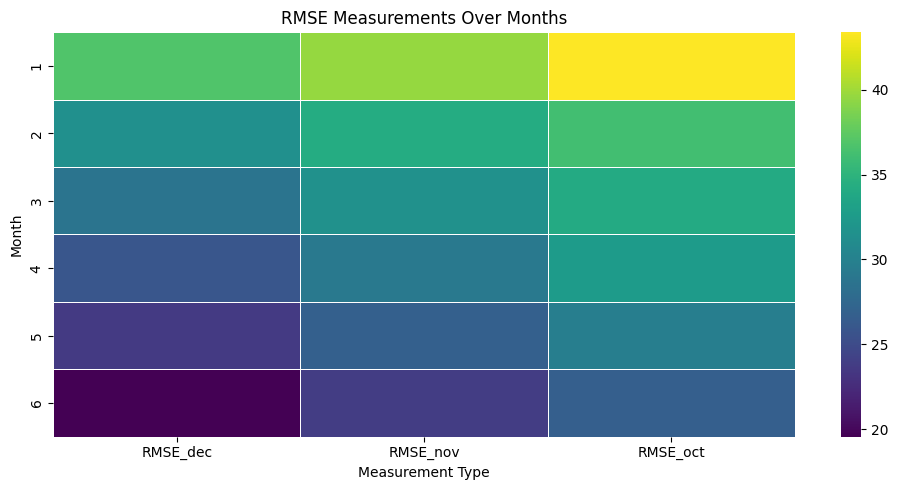

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Your actual DataFrame loading or preparation code here
df = RMSE_bias

df.set_index('month', inplace=True)

# Creating the heatmap
plt.figure(figsize=(10, 5))  # Adjust the figure size as necessary
# sns.heatmap(df, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
sns.heatmap(df, cmap='viridis', linewidths=.5)

plt.title('RMSE Measurements Over Months')
plt.xlabel('Measurement Type')
plt.ylabel('Month')
plt.tight_layout()